In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import FIRE as fire
import imp
imp.reload(fire)

/tmp/ipykernel_4452/3127292840.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'FIRE' from '/media/erik/Samsung_SSD/1_Data/11_Finances/1192_Planning/230806_FIRE/fire-calculator/FIRE.py'>

In [11]:
# Boundary conditions / external effects
all_conditions = fire.FIREExternalConditionsArray('../External.json')
print(f"Available conditions: {all_conditions.keys()}")
conditions = all_conditions.select("SCENARIO_AVERAGE_INFLATION_AND_CAPITAL_TAX")

# Income/assets + Investments
all_investments = fire.FIREInvestmentArray('../Investments.json')
investments = all_investments.select("SCENARIO_1")
print(f"Available investments: {all_investments.keys()}")

# Target
all_targets = fire.FIRETargetArray('../Targets.json')
#target = all_targets.select("SCENARIO_LIVABLE_AGGRESSIVE")
print(f"Available targets: {all_targets.keys()}")

Available conditions: dict_keys(['SCENARIO_AVERAGE_INFLATION_AND_CAPITAL_TAX', 'SCENARIO_WORSTCASE_INFLATION_AND_CAPITAL_TAX'])
Available investments: dict_keys(['SCENARIO_1'])
Available targets: dict_keys(['SCENARIO_RICH_CONSERVATIVE', 'SCENARIO_RICH_AGGRESSIVE', 'SCENARIO_LIVABLE_CONSERVATIVE', 'SCENARIO_LIVABLE_AGGRESSIVE', 'SCENARIO_INCOME_AGGRESSIVE', 'SCENARIO_POOR_AGGRESSIVE'])


# Retirement ages in varying scenarios

In [12]:
# Build up simulations

all_sims = dict()
for tk, tv in all_targets.items():
    simulation = fire.FIRESimulation(investments=investments, target=tv, conditions=conditions)
    simulation.perform()
    all_sims[tk] = simulation.simulation_retirement_age

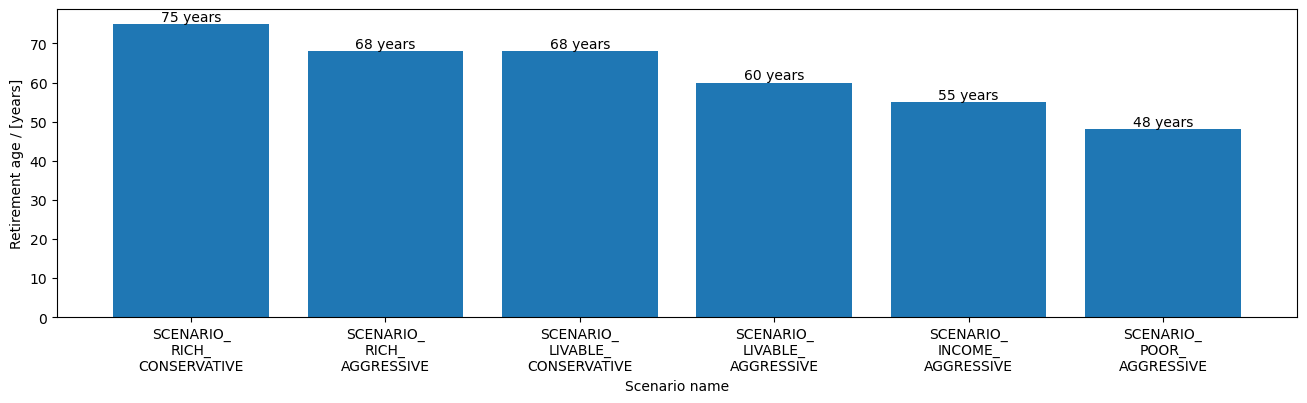

In [13]:
# Plot retirement ages
all_k = [*all_sims.keys()]
all_v = np.array([*all_sims.values()])

plt.figure(figsize=(16, 4))
plt.bar([k.replace("_","_\n") for k in all_k], all_v)
plt.xlabel("Scenario name")
plt.ylabel("Retirement age / [years]")
for ii,(d,v) in enumerate(zip(all_k, all_v)):
    col = "black"
    plt.text(ii, v,f"{v} years", ha = 'center', va='bottom', c=col)

# Influence of monthly investment on retirement age

In [34]:
# Build up simulations
def simulate_investments(scenario, all_rates):
    all_sims = dict()
    for r in all_rates:
        investments.investment_monthly = r
        simulation = fire.FIRESimulation(investments=investments, target=all_targets[scenario], conditions=conditions)
        simulation.perform()
        all_sims[r] = simulation.simulation_retirement_age
    return all_sims

# Plotting
def plot_investments_vs_retirement_age():
    all_rates = np.arange(1000,6000,500)
    net_savings_share, income_tax_rate = 0.45, 0.5
    all_est_incomes = all_rates * 12 / net_savings_share / (1.-income_tax_rate)
    for sc in all_targets.keys():
        all_sims = simulate_investments(sc, all_rates)
        all_k = [*all_sims.keys()]
        all_v = np.array([*all_sims.values()])
        plt.plot(all_k, all_v, label = sc)
        
    plt.title("Influence of monthly investments on retirement age")
    plt.xlabel("Monthly investments / [€]")
    plt.ylabel("Retirement age / [years]")
    plt.legend()
    ax2 = plt.twiny()
    ax2.plot(all_est_incomes, all_v, alpha = 0)
    ax2.set_xlabel("Estimated yearly income / [€]")

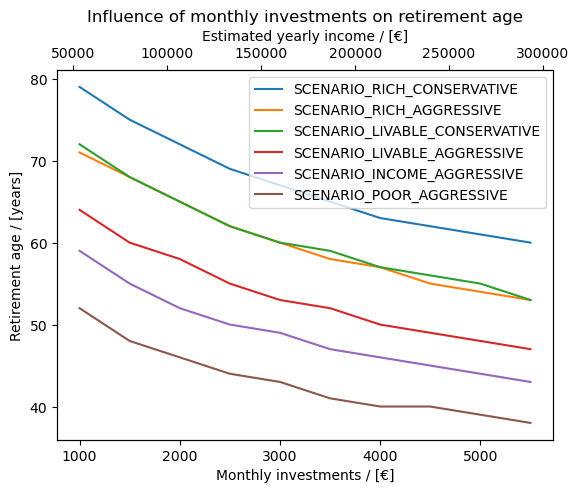

In [35]:
plot_investments_vs_retirement_age()